# Projet Numérique : Equations Différentielles

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, pi, sin, cos, exp

## Question 1

Le terme $\alpha x_1 > 0$ dans $\dot x_1$ représente la capacité de reproduction des proies, tandis que le terme $-\beta x_1 x_2 < 0$ représente la prédation des prédateurs. Ainsi, si la prédation est plus forte que la reproduction à un instant donné, la population de proie diminue.    
Dans l'expression de $\dot x_2$, $-\gamma x_2 < 0$ modélise la compétition entre prédateurs, alors que le terme $\delta x_1 x_2 > 0$ représente la capacité des prédateurs à se nourrir. 

-------

Il est clair que $(0,0)$ est un point d'équilibre du système. Intuitivement, ce point d'équilibre est instable puisqu'il représente la situation où les espèces ne sont pas encore apparues (ou ont disparu), et rien n'empêche leur (ré)apparition.    
Pour trouver le deuxième point d'équilibre, raisonnons par analyse-synthèse.    
*Analyse :*

Supposons l'existence d'un point d'équilibre $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.
Alors $\begin{cases}
0 = \overline{x}_1 (\alpha - \beta \, \overline{x}_2)\\
0 = \overline{x}_2 (\gamma - \delta \, \overline{x}_1) 
\end{cases}$   
Or, $\overline{x}_1$ et $\overline{x}_2$ sont tous deux non nuls donc on déduit immédiatement les solutions suivantes :
$$
\begin{cases}
\overline{x}_1 = \frac {\gamma} {\delta} \\
\overline{x}_2 = \frac {\alpha} {\beta }
\end{cases}
$$   
   
*Synthèse :*   
   
Supposons $\overline{x}$ défini comme ci-dessus. Alors $\overline{x}$ est bien un point d'équilibre du système, et les quatres coefficients étant positifs, on a également $\overline{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.    
   
Intuitivement, ce point d'équilibre est stable puisqu'en l'absence d'action extérieure, de telles populations de proies-prédateurs existent naturellement.

## Question 2

Pour cette question et les suivantes, on prend tous les coefficients égaux à $1$. Les deux points d'équilibre sont donc $(0,0)$ et $(1,1)$.

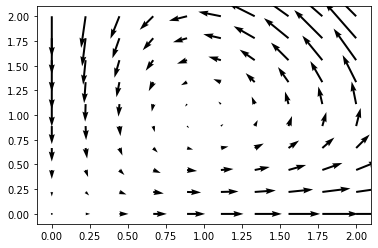

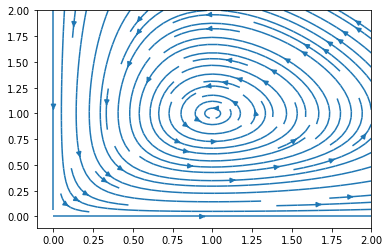

In [5]:
def pp(x, y):
    return x * (1 - y), - y * (1 - x)

x, y = np.meshgrid(np.linspace(0,2,10), np.linspace(0,2,10))
z = pp(x, y)

plt.quiver(x, y, *z)
plt.show();
plt.streamplot(x, y, *z)
plt.show();

## Question 3

On pose
$f:\begin{array}{l|rcl}
\mathbb{R} \times (\mathbb{R}_{>0})^2 \to \mathbb{R}^2 \\
(t,x) \mapsto (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))
\end{array}$   
   
Soit $t,x \in \mathbb{R} \times (\mathbb{R}_{>0})^2$, alors
$$
\partial_x f (t,x) = 
\begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}
$$    
   
Cette fonction existe et est continue par rapport à $t$ et à $x$, donc le théorème de Cauchy-Lipschitz s'applique. On en déduit donc que pour des conditions initiales données $t_0$ et $x_0$, il existe une unique solution maximale.

## Question 4

Soit $t \in \mathbb{R}, \ \partial_t H(x_1(t), x_2(t)) = \delta \dot x_1 - \gamma \frac {\dot x_1} {x_1} + \beta \dot x_2 - \alpha \frac {\dot x_2} {x_2}$.       
Donc $\partial_t H(x_1(t), x_2(t)) = \delta x_1(\alpha - \beta x_2) - \gamma (\alpha - \beta  x_2) - \beta x_2(\gamma -\delta x_1) + \alpha (\gamma - \delta x_1)$.        
On trouve que $\forall t \in \mathbb{R}, \ \partial_t H(x_1(t),x_2(t)) = 0$, ce qui signifie que les solutions initialisées dans $(\mathbb{R}_{>0})^2$ restent sur les courbes de niveau de $H$.     
Si les solutions maximales initialisées dans $(\mathbb{R}_{>0})^2$ n'étaient pas définies sur $\mathbb{R}$, cela signifirait qu'elles "explosent" en temps fini ou infini d'après le théorème du domaine maximal d'existence, ce qui est impossible puisqu'elles restent sur une courbe de niveau de $H$. Par conséquent, une solution maximale initialisée dans $(\mathbb{R}_{>0})^2$ est définie sur $\mathbb{R}$ tout entier.

## Question 5

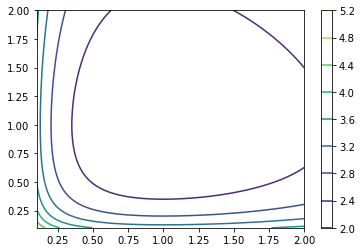

In [21]:
def H(x, y):
    return x - log(x) + y - log(y)

vectorized_H = np.vectorize(H)

x, y = np.meshgrid(np.linspace(0.1,2,100), np.linspace(0.1,2,100))
z = vectorized_H(x, y)

plt.contour(x, y, z)
plt.colorbar()
plt.show();

Ces courbes de niveau laissent penser que $\overline{x}$ est un minimum de $H$. On peut d'ailleurs confirmer par le calcul que c'est son minimum global.

## Question 6

In [2]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    for k in range(int((tf-t0)/dt)):
        t.append(t[k] + dt)
        x.append(x[k] + dt * f(t[k], x[k]))
    if t[-1] != tf:
        t.append(tf)
        x.append(x[-1] + dt * f(t[-1], x[-1]))
    return t, x

In [17]:
def f(t, x):
    return 2*x + sin(t)

def sol(t):
    return 1/5 * (exp(2*t) - 2*sin(t) - cos(t))

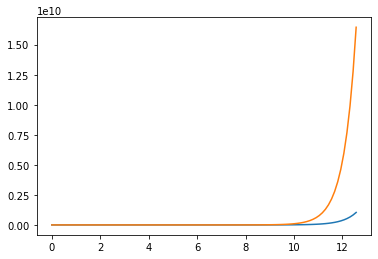

In [24]:
T_e, X_e = solve_euler_explicit(f, 0, 4*pi/100, 0, 4*pi)
T_r = np.linspace(0, 4*pi, 100)
X_r = np.vectorize(sol)(T_r)

plt.plot(T_e, X_e)
plt.plot(T_r, X_r)
plt.show()

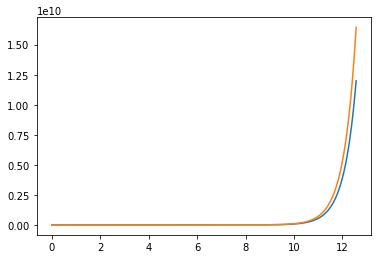

In [28]:
T_e1, X_e1 = solve_euler_explicit(f, 0, 4*pi/1000, 0, 4*pi)
T_r1 = np.linspace(0, 4*pi, 1000)
X_r1 = np.vectorize(sol)(T_r1)

plt.plot(T_e1, X_e1)
plt.plot(T_r1, X_r1)
plt.show()

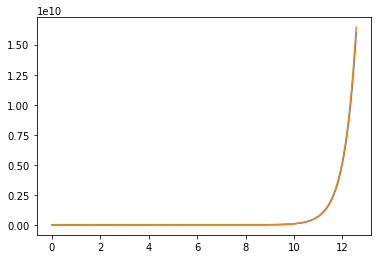

In [29]:
T_e2, X_e2 = solve_euler_explicit(f, 0, 4*pi/10000, 0, 4*pi)
T_r2 = np.linspace(0, 4*pi, 10000)
X_r2 = np.vectorize(sol)(T_r2)

plt.plot(T_e2, X_e2)
plt.plot(T_r2, X_r2)
plt.show()

On observe bien une convergence du schéma quand $dt \rightarrow 0$.

## Question 7

In [33]:
alph, bet, gam, delt = 3, 1, 2, 1

def lotka_volterra(t, x):
    return [x[0] * (alph - bet * x[1]), -x[1] * (gam - delt * x[0])]

In [35]:
T_elv, X_elv = solve_euler_explicit(lotka_volterra, [1, 2], 1/1000, 0, 1000)

TypeError: can't multiply sequence by non-int of type 'float'